In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Plotting data

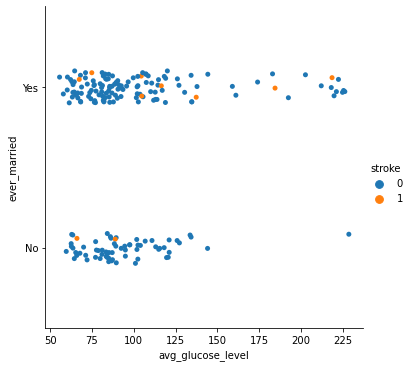

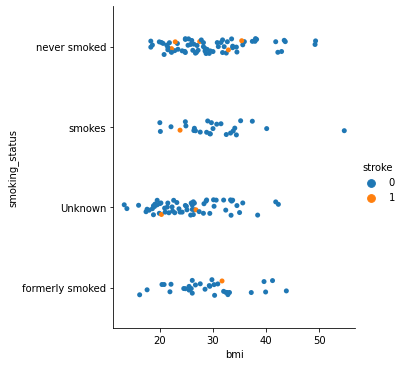

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split


stroke_data = pd.read_csv("healthcare-dataset-stroke-data.csv")
stroke_data_sample = pd.read_csv("healthcare-dataset-stroke-data.csv").sample(200, random_state=44)


X = stroke_data.drop('stroke', axis=1).drop('id', axis=1)
y = stroke_data['stroke']


a = sns.catplot(x="avg_glucose_level", y="ever_married", hue="stroke", data=stroke_data_sample)

a = sns.catplot(x="bmi", y="smoking_status", hue="stroke", data=stroke_data_sample)

# Importing data


In [ ]:
#dropNaNs
dataset = pd.read_csv(r"healthcare-dataset-stroke-data.csv")
dataset.dropna(inplace=True)

X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

One-hot encoding for work-type/residence/smoking/m-f (This one is currently not used!)


In [ ]:
#trying out a different method for one hot encoding so its looks cleaner, not fully tested yet
#ohe = OneHotEncoder(categories='auto')
#feature_arr = ohe.fit_transform(df[['gender','work_type','Residence_type','smoking_status']]).toarray()
#feature_labels = ohe.categories_
#feature_labels = np.array(feature_labels).ravel()

#features = pd.DataFrame(feature_arr, columns=feature_labels)

# One-hot-encoder

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
#gender
ct1 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct1.fit_transform(X))
#ever_married
ct2 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [6])], remainder='passthrough')
X = np.array(ct2.fit_transform(X))
#work_type
ct3 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [8])], remainder='passthrough')
X = np.array(ct3.fit_transform(X))
#Residence_type
ct4 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [13])], remainder='passthrough')
X = np.array(ct4.fit_transform(X))
#smoking_status
ct5 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [17])], remainder='passthrough')
X = np.array(ct5.fit_transform(X))



# Spliting data: (use the training sets for cross validation etc  (: )

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Scaling features (If needed: For now I used it!)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# The SVC classifier: Training

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV 

param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
svcgrid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

svcgrid.fit(X_train, y_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.957, total=   0.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.957, total=   0.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.957, total=   0.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.957, total=   0.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.957, total=   0.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.957, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.957, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.957, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.957, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.957, total=   0.3s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.957, total=   0.2s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.957, total=   0.2s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.957, total=   0.2s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.957, total=   0.2s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.957, total=   0.2s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.957, total=   0.2s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.957, total=   1.8s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.957, total=   1.8s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.957, total=   0.8s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.957, total=   0.8s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.957, total=   1.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.957, total=   0.8s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.957, total=   0.8s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:   39.2s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

Some links that I used

In [ ]:
#https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
#https://scikit-learn.org/0.15/modules/cross_validation.html

# Cross validation for the best estimator of the SVC classifier

In [ ]:
from sklearn.model_selection import cross_val_score

#These are the best hyperparameters found during gridsearch
print(svcgrid.best_estimator_) 
#cross validation score for the best estimator currently found.
scores = cross_val_score(svcgrid.best_estimator_, X_train, y_train, cv=5)
scores
scores.mean()


SVC(C=0.1, gamma=1)


0.9565335378443749

Fit the model which we can use for testing

In [ ]:
svcgrid.best_estimator_.fit(X_train, y_train)

SVC(C=0.1, gamma=1)

# KNN classifier: Training

In [1]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
param_grid_knn = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23],  
              'weights': ['uniform', 'distance']
              }  
knngrid = GridSearchCV(KNeighborsClassifier(), param_grid_knn, refit = True, verbose = 3) 
knngrid.fit(X_train, y_train)




NameError: ignored

## knn visualization of different values for K

Automatically created module for IPython interactive environment


Text(0, 0.5, 'Mean Error')

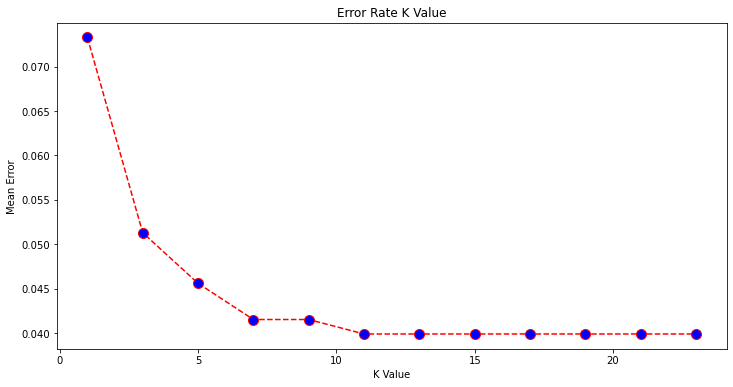

In [ ]:
# resource: https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

error = []

# Calculating error for K values between 1 and 40
for i in [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12, 6))
plt.plot([1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23], error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# Cross validation for the best estimator of the KNN classifier

In [ ]:
from sklearn.model_selection import cross_val_score

#These are the best hyperparameters found during gridsearch
print(knngrid.best_estimator_) 
#cross validation score for the best estimator currently found.
scores2 = cross_val_score(knngrid.best_estimator_, X_train, y_train, cv=5)
scores2
scores2.mean()

KNeighborsClassifier(n_neighbors=17)


0.9565335378443749

Fit the model which we can use for testing

In [ ]:
svcgrid.best_estimator_.fit(X_train, y_train)

SVC(C=0.1, gamma=1)

# Simple neural network - training and testing

In [ ]:

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=100, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=1)
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
clf.predict_proba(X_test[:1])
clf.predict(X_test[:5, :])
clf.score(X_test, y_test)



0.88

## grid search for mlp classifier

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=100)

parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    
y_true, y_pred = y_test , clf.predict(X_test)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))


from sklearn.learning_curve import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.957 (+/-0.000) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.947 (+/-0.012) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.956 (+/-0.001) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.945 (+/-0.004) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.957 (+/-0.001) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.944 (+/-0.002) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver':

C:\Users\vveen\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ModuleNotFoundError: No module named 'sklearn.learning_curve'

## f1 score

In [ ]:
from sklearn.metrics import f1_score

# the average parameter can take many different arguements. In this case we used weighted which calculates 
# the metrics for each label, and find their average weighted by support (the number of true instances for 
# each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not 
# between precision and recall.
f1_score(y_true, y_pred, average='weighted')


0.9192207792207792

## precision score

In [ ]:
from sklearn.metrics import precision_score
# there are many different arguements for the average paramter but we stuck with 'weighted' as in the f1 score. 
precision_score(y_true, y_pred, average='weighted')

0.9306666666666666

## rerun the test and see the increased accuracy


In [ ]:
clf.score(X_test, y_test)

0.92

In [ ]:
#links i used:
#https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
#https://datascience.stackexchange.com/questions/36049/how-to-adjust-the-hyperparameters-of-mlp-classifier-to-get-more-perfect-performa